# Performing combined approximation, continuity and energy objective optimization experiments

In this Jupyter notebook we extend $C^k$-loss towards periodicity and cyclicity.

Version 0.1  
Date: 2025-03-01  
Current version: hannes.waclawek@fh-salzburg.ac.at  

In [1]:
import copy

# Imports
import numpy as np
import tensorflow as tf
from tensorflow import keras
import multiprocessing as mp
from itertools import repeat

from tfspline import model, parallel, plot, sampledata

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

%load_ext autoreload
%autoreload 2

# Periodicity vs. Cyclicity

By $C^k$-cyclicity we mean that the derivative $f^{(i)}$ matches on $x_1$ and $x_n$ for $1 \leq i \leq k$.  
If it additionally matches for $i = 0$ then we have $C^k$-periodicity. 

## Data


Text(0.5, 1.0, 'Scaled to range [0, 2] for 2 polynomial segments')

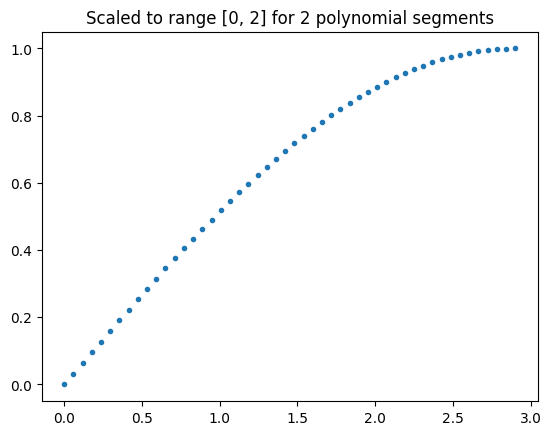

In [2]:
# The data set to approximate with x and y samples
xs2_ori = np.linspace(0, 0.5*np.pi, 50)
ys2 = np.sin(xs2_ori)
#plt.plot(xs2_ori, ys2, '.')
xs2 = sampledata.rescale_input_data(xs2_ori, 2.9)
plt.plot(xs2, ys2, '.')
plt.title('Scaled to range [0, 2] for 2 polynomial segments')

Text(0.5, 1.0, 'Scaled to range [0, 4] for 4 polynomial segments')

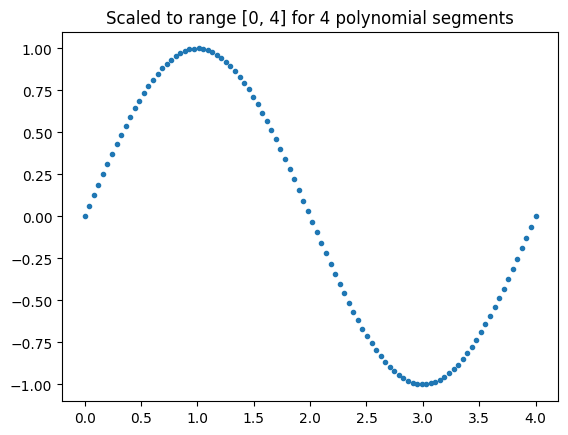

In [3]:
xsin = np.linspace(0, 2*np.pi, 100)
ysin = np.sin(xsin)
xsin = sampledata.rescale_input_data(xsin, 4)

plt.plot(xsin, ysin, '.')
plt.title('Scaled to range [0, 4] for 4 polynomial segments')

Text(0.5, 1.0, 'Scaled to range [0, 10] for 10 polynomial segments')

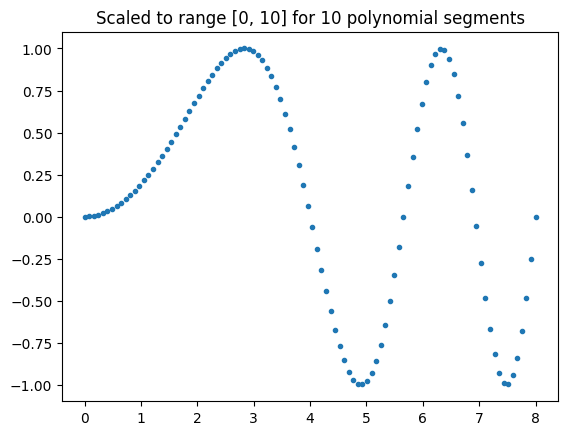

In [4]:
xsinvar = np.linspace(0, 1, 100)
ysinvar = np.sin(xsinvar**2 * 4 * np.pi)
xsinvar = sampledata.rescale_input_data(xsinvar, 8)

plt.plot(xsinvar, ysinvar, '.')
plt.title('Scaled to range [0, 10] for 10 polynomial segments')

Text(0.5, 1.0, 'Scaled to range [0, 2] for 2 polynomial segments')

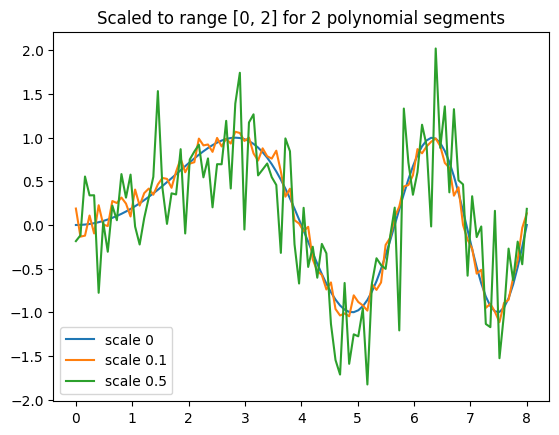

In [5]:
# Explicit seed to have reproducible testsets
np.random.seed(0)
ys2gauss_scales = [0.0, 0.1, 0.5]
ys2gauss = [ysinvar + np.random.normal(scale=s, size=len(ysinvar)) for s in ys2gauss_scales]

for i, ysn in enumerate(ys2gauss):
    plt.plot(xsinvar, ysn, '-', label='scale %.2g' % ys2gauss_scales[i])
plt.legend(loc="best")
plt.title('Scaled to range [0, 2] for 2 polynomial segments')

### No cyclicity

In [41]:
ck = 3
polynum=2
degree = 7
learning_rate = 0.1

In [16]:
alpha = 0.1
beta = 0.9
epochs=600

pp = model.Spline(polydegree=degree, polynum=polynum, ck=ck, basis='power')
opt = keras.optimizers.Adam(amsgrad=True, learning_rate=learning_rate, )

pp.fit(xsin, ysin, optimizer=opt, n_epochs=epochs, factor_ck_pressure=alpha, factor_approximation_quality=beta, factor_curvature=1-alpha-beta, early_stopping=True, patience=100, cyclic=False)
loss = pp.get_total_loss()

In [17]:
pp.get_total_loss()

<tf.Tensor: shape=(), dtype=float64, numpy=13.412025744662296>

/home/hannes/Documents/FHGitRepos/venvs/energyopt-pp/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


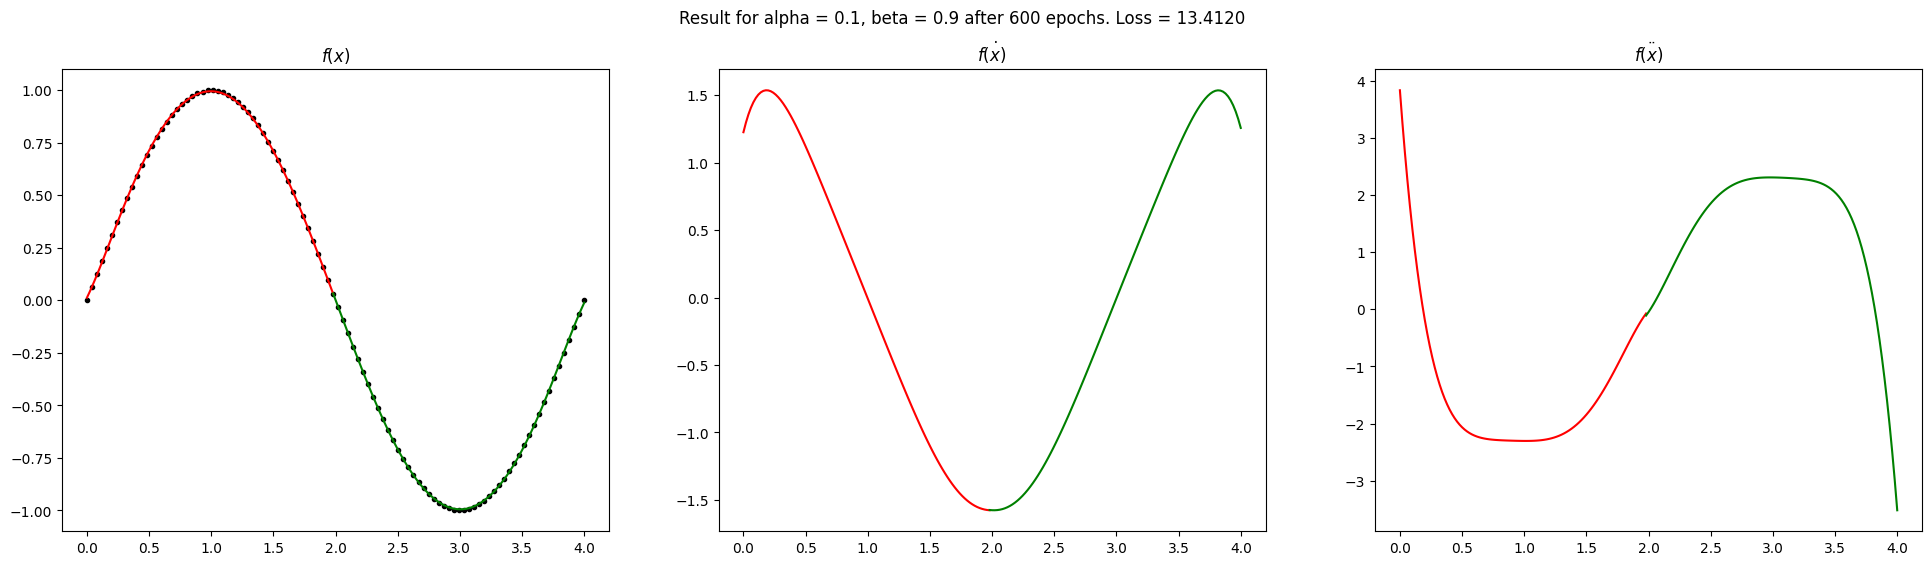

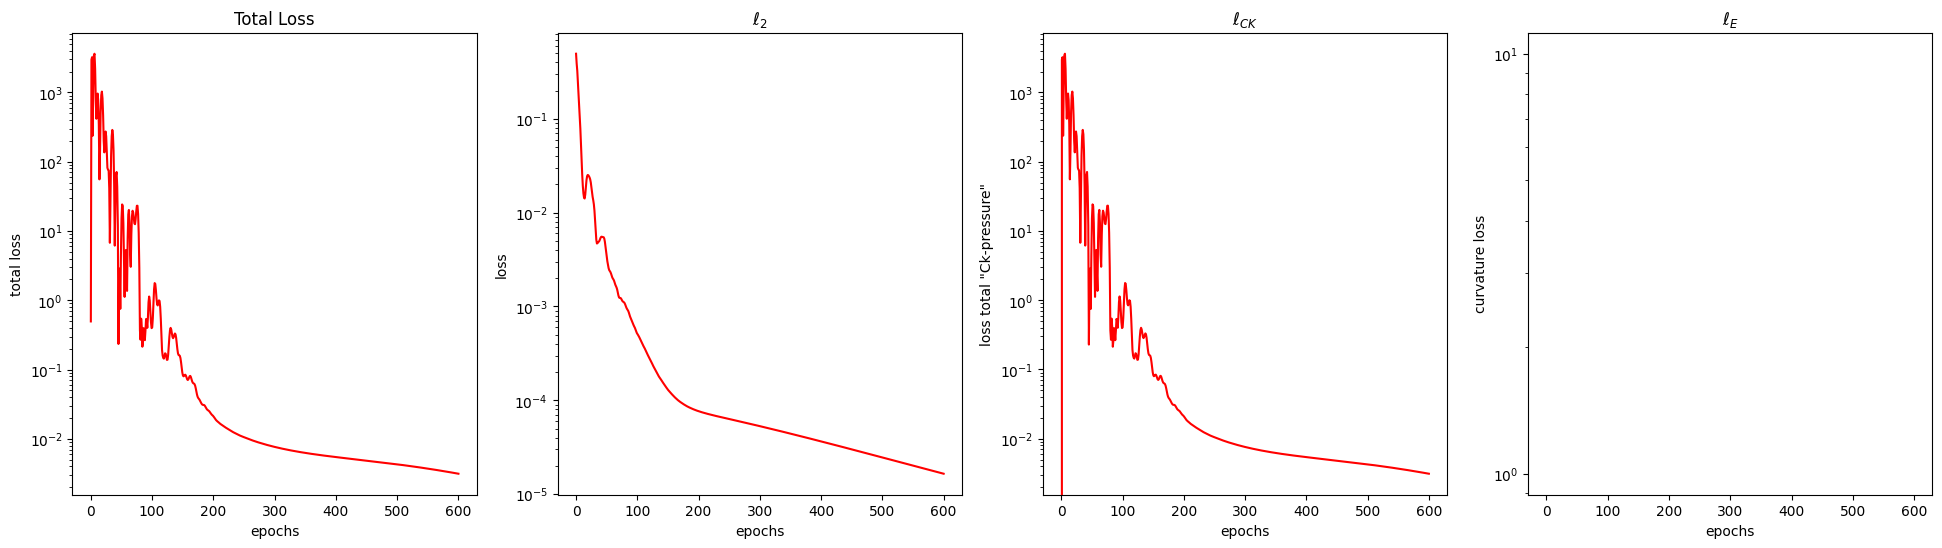

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3) 
fig.set_figwidth(24)
fig.set_figheight(6)
fig.suptitle(f'Result for alpha = {alpha}, beta = {beta} after {epochs} epochs. Loss = {loss:.4f}')

plot.plot_spline(pp, ax=ax1, title='$f(x)$')
plot.plot_spline(pp, deriv=1, ax=ax2, title='$\dot{f(x)}$')
plot.plot_spline(pp, deriv=2, ax=ax3, title='$\ddot{f(x)}$')
plot.plot_loss(pp, 'all')

### Cyclicity

In [19]:
alpha = 0.1
beta = 0.9
epochs=600

pp = model.Spline(polydegree=degree, polynum=polynum, ck=ck, basis='power')
opt = keras.optimizers.Adam(amsgrad=True, learning_rate=learning_rate, )

pp.fit(xsin, ysin, optimizer=opt, n_epochs=epochs, factor_ck_pressure=alpha, factor_approximation_quality=beta, factor_curvature=1-alpha-beta, early_stopping=True, patience=100, cyclic=True)
loss = pp.get_total_loss()

/home/hannes/Documents/FHGitRepos/venvs/energyopt-pp/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


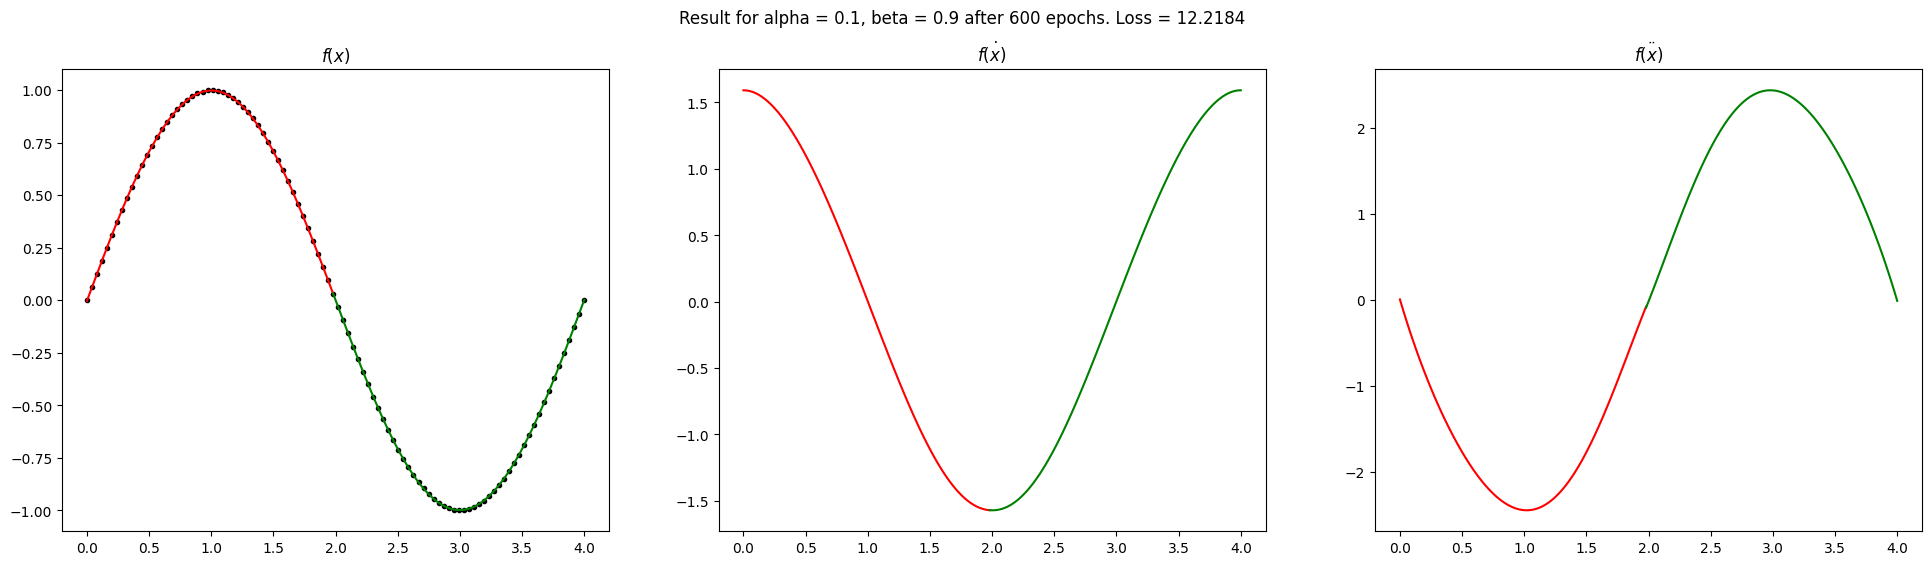

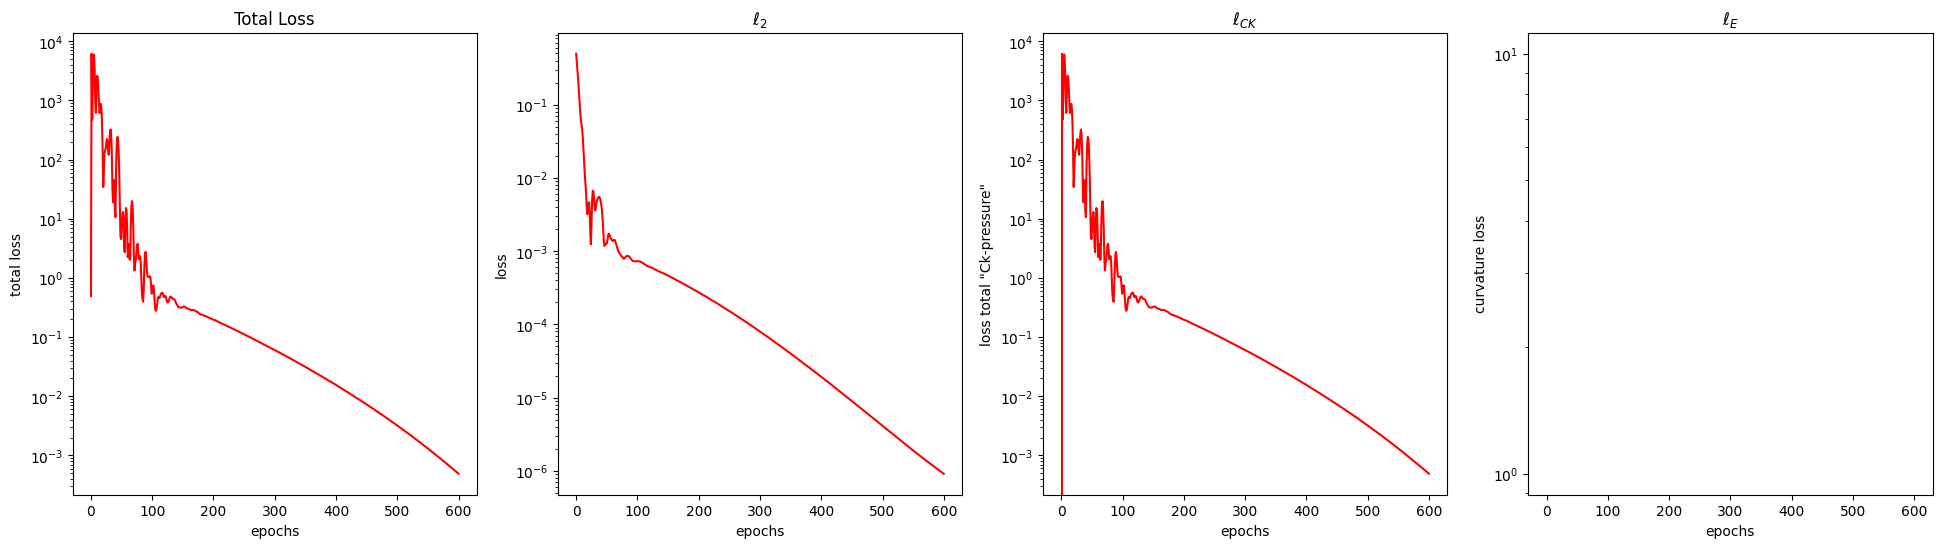

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3) 
fig.set_figwidth(24)
fig.set_figheight(6)
fig.suptitle(f'Result for alpha = {alpha}, beta = {beta} after {epochs} epochs. Loss = {loss:.4f}')

plot.plot_spline(pp, ax=ax1, title='$f(x)$')
plot.plot_spline(pp, deriv=1, ax=ax2, title='$\dot{f(x)}$')
plot.plot_spline(pp, deriv=2, ax=ax3, title='$\ddot{f(x)}$')
plot.plot_loss(pp, 'all')

### Periodicity

In [21]:
alpha = 0.1
beta = 0.9
epochs=600

pp = model.Spline(polydegree=degree, polynum=polynum, ck=ck, basis='power')
opt = keras.optimizers.Adam(amsgrad=True, learning_rate=learning_rate, )

pp.fit(xsin, ysin, optimizer=opt, n_epochs=epochs, factor_ck_pressure=alpha, factor_approximation_quality=beta, factor_curvature=1-alpha-beta, early_stopping=True, patience=100, periodic=True)
loss = pp.get_total_loss()

Early stop: Achieved best result after 75 epochs. Exiting.


/home/hannes/Documents/FHGitRepos/venvs/energyopt-pp/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


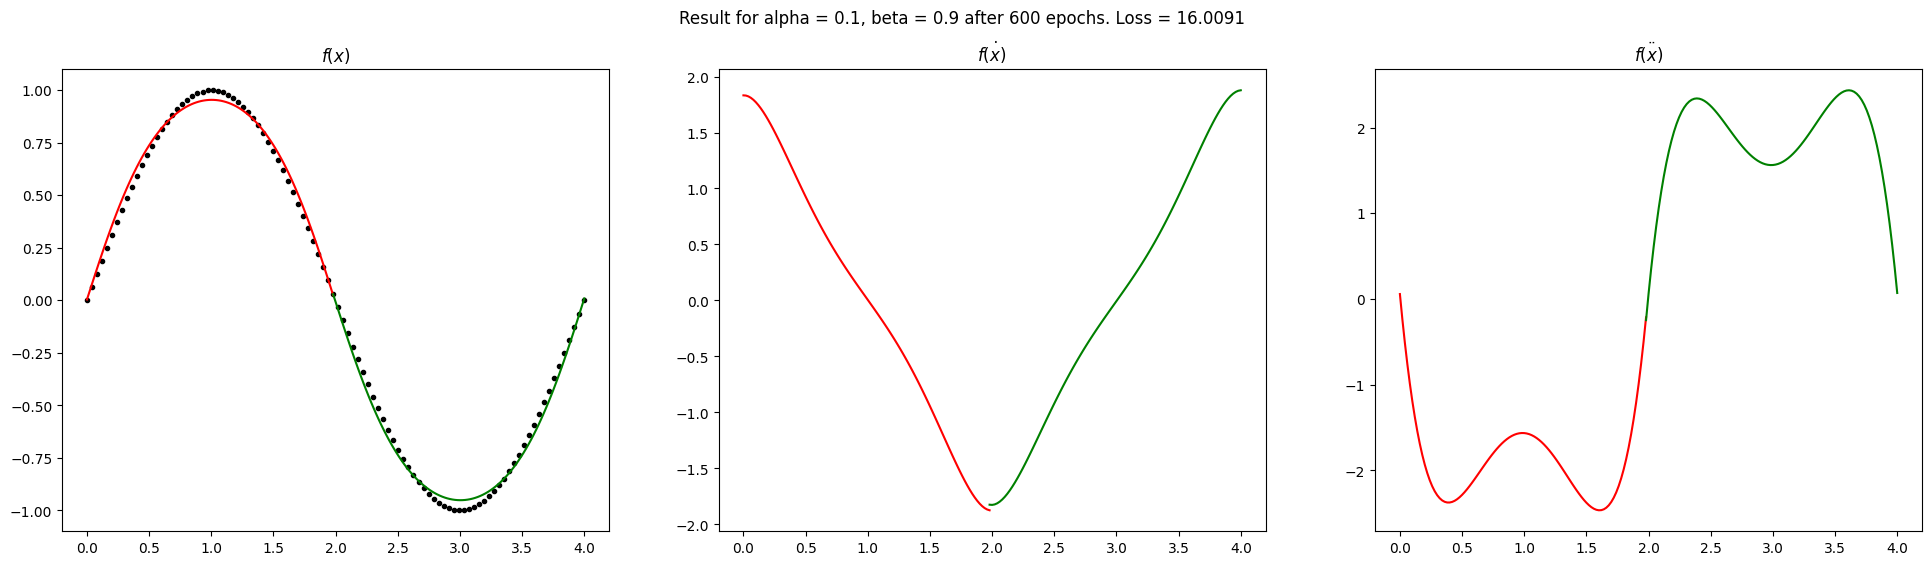

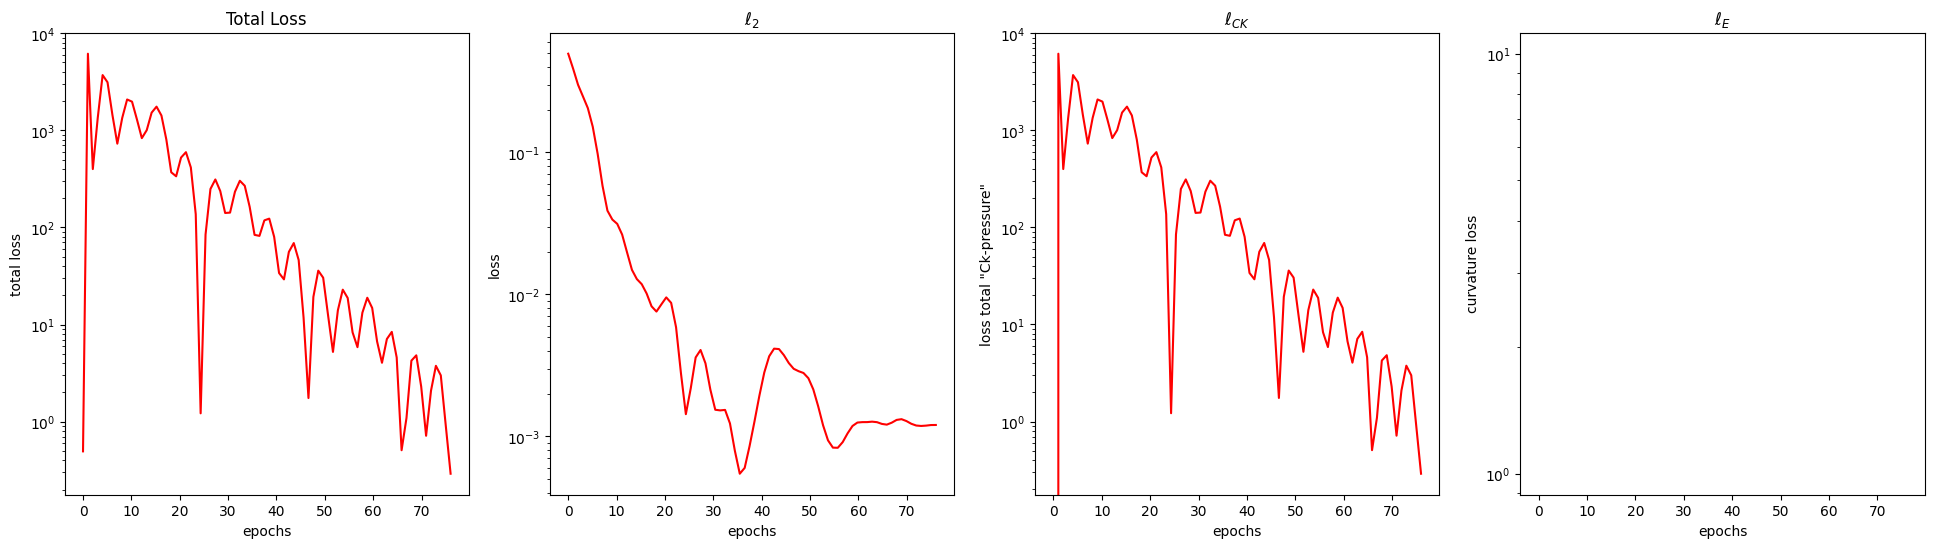

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3) 
fig.set_figwidth(24)
fig.set_figheight(6)
fig.suptitle(f'Result for alpha = {alpha}, beta = {beta} after {epochs} epochs. Loss = {loss:.4f}')

plot.plot_spline(pp, ax=ax1, title='$f(x)$')
plot.plot_spline(pp, deriv=1, ax=ax2, title='$\dot{f(x)}$')
plot.plot_spline(pp, deriv=2, ax=ax3, title='$\ddot{f(x)}$')
plot.plot_loss(pp, 'all')

### Interpretation

We see that, with sine data as input and 2 segments, cyclicity pulls the overall result in a much better shape especially in the second derivative. 
For periodicity, 2 segments do not provide a better result, we need more segments.  
Both optimization for cyclicity and periodicity works!  